In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("./week_testing/NSC_data.csv")
df_morn.info()

#create columns for counts
counts_1_3 = df_morn['Chan_0_1']
counts_2_3 = df_morn['Chan_0_2']
counts_1_2 = df_morn['Chan_1_2']

timestamps = df_morn['timestamp'].values
print(type(timestamps))
print(df_morn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9583 entries, 0 to 9582
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   9583 non-null   int64 
 1   Chan_0_2   9583 non-null   int64 
 2   Chan_1_2   9583 non-null   int64 
 3   timestamp  9583 non-null   object
dtypes: int64(3), object(1)
memory usage: 299.6+ KB
<class 'numpy.ndarray'>
      Chan_0_1  Chan_0_2  Chan_1_2                  timestamp
0           14        12        15   Thu Mar  9 12:20:32 2023
1           24        15        18   Thu Mar  9 12:21:32 2023
2           14         9         8   Thu Mar  9 12:22:32 2023
3           19        14        14   Thu Mar  9 12:23:32 2023
4           16         8        10   Thu Mar  9 12:24:32 2023
...        ...       ...       ...                        ...
9578        16        13        16   Thu Mar 16 05:18:02 2023
9579        12        11        16   Thu Mar 16 05:19:02 2023
9580        12        10  

In [30]:
df_morn.dropna(inplace=True)

In [31]:
df_morn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9583 entries, 0 to 9582
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   9583 non-null   int64 
 1   Chan_0_2   9583 non-null   int64 
 2   Chan_1_2   9583 non-null   int64 
 3   timestamp  9583 non-null   object
dtypes: int64(3), object(1)
memory usage: 299.6+ KB


In [32]:
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,14,12,15,2023-03-09 12:20:32
1,24,15,18,2023-03-09 12:21:32
2,14,9,8,2023-03-09 12:22:32
3,19,14,14,2023-03-09 12:23:32
4,16,8,10,2023-03-09 12:24:32


In [33]:
df_morn.sort_values(by='timestamp', ascending=True, inplace=True)
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,14,12,15,2023-03-09 12:20:32
1,24,15,18,2023-03-09 12:21:32
2,14,9,8,2023-03-09 12:22:32
3,19,14,14,2023-03-09 12:23:32
4,16,8,10,2023-03-09 12:24:32


In [34]:
df_morn_counts = df_morn[['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2']]
df_morn_counts.columns

Index(['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2'], dtype='object')

In [35]:
df_morn_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9583 entries, 0 to 9582
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  9583 non-null   datetime64[ns]
 1   Chan_0_1   9583 non-null   int64         
 2   Chan_0_2   9583 non-null   int64         
 3   Chan_1_2   9583 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 374.3 KB


In [36]:
df_morn_counts = df_morn_counts.resample('H', on = 'timestamp', axis=0).mean()
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-03-09 12:00:00,17.000000,10.800000,13.600000
2023-03-09 13:00:00,17.983333,10.866667,14.966667
2023-03-09 14:00:00,17.766667,12.333333,15.616667
2023-03-09 15:00:00,14.661017,12.067797,14.457627
2023-03-09 16:00:00,27.406780,27.389831,24.220339


In [37]:
#df_morn_counts= df_morn.interpolate(method='linear', limit_direction='both')  
#df_morn_counts.drop_duplicates(inplace=True)

#df_morn_counts.head(20)

Text(0.5, 1.0, 'March 18 Morning Individualized Counts')

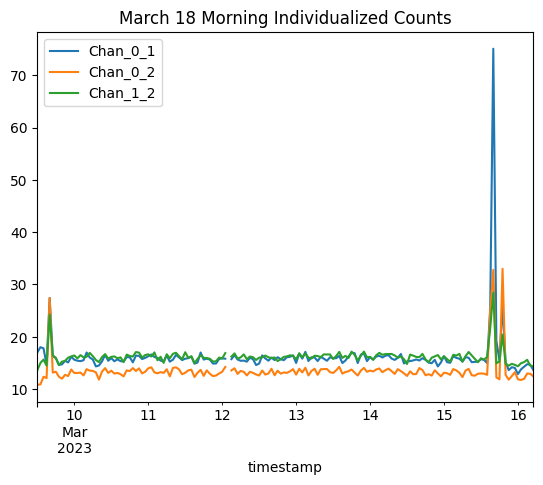

In [38]:
df_morn_counts.plot()
plt.title('March 18 Morning Individualized Counts')

In [39]:
df_morn_counts['average'] = df_morn_counts[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,average
timestamp,,,,
2023-03-09 12:00:00,17.000000,10.800000,13.600000,13.800000
2023-03-09 13:00:00,17.983333,10.866667,14.966667,14.605556
2023-03-09 14:00:00,17.766667,12.333333,15.616667,15.238889
2023-03-09 15:00:00,14.661017,12.067797,14.457627,13.728814
2023-03-09 16:00:00,27.406780,27.389831,24.220339,26.338983


Text(0.5, 1.0, 'Natural Sciences Center Weekly Collection')

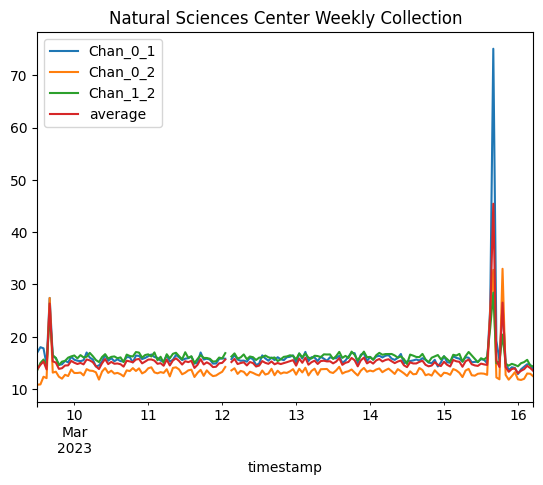

In [43]:
df_morn_counts.plot()
plt.title('Natural Sciences Center Weekly Collection')
#plt.ylim(0, 150)

Text(0.5, 1.0, 'March 18 Morning Average Counts')

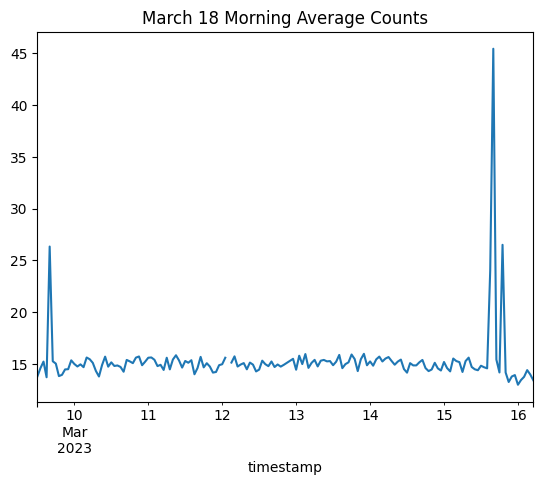

In [41]:
df_morn_counts['average'].plot()
plt.title('March 18 Morning Average Counts')